In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('data/user_transactions_Uzhhorod.csv')

In [3]:
data.shape

(16997713, 4)

In [4]:
data.head()

,user_id,event_dt,lat,lon
0,132414,2020-09-21 19:32:00,48.517340,22.258224
1,132414,2020-09-21 14:44:30,48.640790,22.324755
2,132414,2020-09-10 20:14:19,48.564910,22.314552
3,132414,2020-09-10 16:28:06,48.553204,22.303719
4,132414,2020-09-01 15:02:01,48.617973,22.291197


In [6]:
data['event_dt'] = pd.to_datetime(data['event_dt'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16997713 entries, 0 to 16997712
Data columns (total 4 columns):
user_id     int64
event_dt    datetime64[ns]
lat         float64
lon         float64
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 518.7 MB


In [57]:
data.lat = data.lat.astype(np.float16)
data.lon = data.lon.astype(np.float16)
data.user_id = data.user_id.astype(np.int32)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16997713 entries, 0 to 16997712
Data columns (total 4 columns):
user_id     int32
event_dt    datetime64[ns]
lat         float16
lon         float16
dtypes: datetime64[ns](1), float16(2), int32(1)
memory usage: 259.4 MB


In [5]:
data.head(10)

,user_id,event_dt,lat,lon
0,132414,2020-09-21 19:32:00,48.517340,22.258224
1,132414,2020-09-21 14:44:30,48.640790,22.324755
2,132414,2020-09-10 20:14:19,48.564910,22.314552
3,132414,2020-09-10 16:28:06,48.553204,22.303719
4,132414,2020-09-01 15:02:01,48.617973,22.291197
5,132414,2020-09-01 10:39:13,48.517340,22.258224
6,132414,2020-09-01 14:41:58,48.635520,22.288963
7,132414,2020-09-23 08:26:52,48.689697,22.398240
8,132414,2020-09-10 11:43:56,48.564910,22.314552
9,132414,2020-09-10 18:39:42,48.640790,22.324755


In [6]:
data = data.sort_values(['user_id'], ascending=True) \
    .groupby(['user_id'], sort=False) \
    .apply(lambda x: x.sort_values(['event_dt'], ascending=True)) \
    .reset_index(drop=True)

In [55]:
data.head(10)

,user_id,event_dt,lat,lon
0,100275,2020-09-01 00:04:42,50.450253,30.529755
1,100275,2020-09-01 00:04:44,50.450253,30.529755
2,100275,2020-09-01 00:34:42,50.450253,30.529755
3,100275,2020-09-01 00:34:44,50.450253,30.529755
4,100275,2020-09-01 01:04:42,50.450253,30.529755
5,100275,2020-09-01 01:04:44,50.450253,30.529755
6,100275,2020-09-01 01:34:46,50.450253,30.529755
7,100275,2020-09-01 01:34:49,50.450253,30.529755
8,100275,2020-09-01 02:04:46,50.449837,30.529175
9,100275,2020-09-01 02:04:49,50.449837,30.529175


In [99]:
import json

with open('data/Uzhhorod.geojson') as f:
    coords = json.load(f)

In [105]:
for i in range(len(coords['coordinates'][0])):
    coords['coordinates'][0][i].reverse()

coords['coordinates'][0][:10]

[[22.307169, 48.581001],
 [22.307093, 48.581009],
 [22.306871, 48.581032],
 [22.303324, 48.581073],
 [22.30322, 48.58111],
 [22.303171, 48.582689],
 [22.30326, 48.58289],
 [22.303069, 48.583021],
 [22.301615, 48.582973],
 [22.30167, 48.582286]]

In [106]:
from shapely.geometry import Point, Polygon
from functools import partial
import shapely.ops
import pyproj

polygon = Polygon(coords['coordinates'][0])

# tfm = partial(pyproj.transform, 
#               pyproj.Proj(init="epsg:4326"), 
#               pyproj.Proj(init="epsg:3031"))

# polygon = shapely.ops.transform(tfm, polygon)

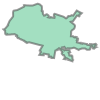

In [107]:
polygon

In [11]:
p1 = Point(22.2996, 48.6328)
p2 = Point(22.3230, 48.6469)

print(p1.within(polygon))
print(p2.within(polygon))

print(polygon.contains(p1))
print(polygon.contains(p2))

True
False
True
False


In [12]:
inside = []
for _, point in data.iterrows():
    p = Point(point['lon'], point['lat'])
    if polygon.contains(p):
        inside.append(1)
    else:
        inside.append(0)

In [13]:
len(inside)

16997713

In [14]:
data['inside'] = inside

In [15]:
data.head()

,user_id,event_dt,lat,lon,inside
0,100275,2020-09-01 00:04:42,50.450253,30.529755,0
1,100275,2020-09-01 00:04:44,50.450253,30.529755,0
2,100275,2020-09-01 00:34:42,50.450253,30.529755,0
3,100275,2020-09-01 00:34:44,50.450253,30.529755,0
4,100275,2020-09-01 01:04:42,50.450253,30.529755,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16997713 entries, 0 to 16997712
Data columns (total 5 columns):
user_id     int32
event_dt    datetime64[ns]
lat         float16
lon         float16
inside      int64
dtypes: datetime64[ns](1), float16(2), int32(1), int64(1)
memory usage: 389.0 MB


In [32]:
data.inside = data.inside.astype(np.int32)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16997713 entries, 0 to 16997712
Data columns (total 5 columns):
user_id     int32
event_dt    datetime64[ns]
lat         float16
lon         float16
inside      int32
dtypes: datetime64[ns](1), float16(2), int32(2)
memory usage: 324.2 MB


In [ ]:
data.to_csv('data/inside_city.csv', index=False)

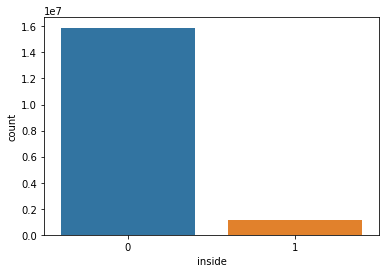

In [16]:
sns.countplot(x='inside', data=data)

In [44]:
data.inside.value_counts()

0    16159231
1      838482
Name: inside, dtype: int64

In [3]:
data = pd.read_csv('data/inside_city.csv')

In [4]:
data.head()

,user_id,event_dt,lat,lon,inside
0,100275,2020-09-01 00:04:42,50.450253,30.529755,0
1,100275,2020-09-01 00:04:44,50.450253,30.529755,0
2,100275,2020-09-01 00:34:42,50.450253,30.529755,0
3,100275,2020-09-01 00:34:44,50.450253,30.529755,0
4,100275,2020-09-01 01:04:42,50.450253,30.529755,0


In [69]:
data.isna().sum()

user_id     0
event_dt    0
lat         0
lon         0
inside      0
dtype: int64

In [5]:
data[3:7]

,user_id,event_dt,lat,lon,inside
3,100275,2020-09-01 00:34:44,50.44,30.53,0
4,100275,2020-09-01 01:04:42,50.44,30.53,0
5,100275,2020-09-01 01:04:44,50.44,30.53,0
6,100275,2020-09-01 01:34:46,50.44,30.53,0


In [5]:
data = data.sort_values(['user_id'], ascending=True) \
    .groupby(['user_id'], sort=False) \
    .apply(lambda x: x.sort_values(['event_dt'], ascending=False)) \
    .reset_index(drop=True)

In [6]:
data.head()

,user_id,event_dt,lat,lon,inside
0,100275,2020-09-02 14:52:33,48.650105,22.266102,1
1,100275,2020-09-02 14:52:25,48.648770,22.267220,1
2,100275,2020-09-02 14:20:57,48.651142,22.264708,1
3,100275,2020-09-02 14:20:13,48.652440,22.266167,1
4,100275,2020-09-02 14:20:13,48.651170,22.265045,1


In [7]:
counts = data.groupby('user_id').count().event_dt.tolist()

In [8]:
counts[:10]

[798, 9241, 540, 7429, 3607, 725, 1640, 1855, 2213, 4207]

In [9]:
len(counts)

5596

In [10]:
routes = pd.DataFrame(columns=['user_id', 'start_coords', 'finish_coords', 'dt_start', 'dt_finish'])

In [59]:
data.head()

,user_id,event_dt,lat,lon,inside
0,100275,2020-09-01 00:04:42,50.450253,30.529755,0
1,100275,2020-09-01 00:04:44,50.450253,30.529755,0
2,100275,2020-09-01 00:34:42,50.450253,30.529755,0
3,100275,2020-09-01 00:34:44,50.450253,30.529755,0
4,100275,2020-09-01 01:04:42,50.450253,30.529755,0


In [12]:
data.shape

(16997713, 5)

In [13]:
routes

,user_id,start_coords,finish_coords,dt_start,dt_finish


In [14]:
from tqdm import tqdm

last_index = 0

for index in tqdm(counts):
    tmp = data[last_index:last_index+index]
    tmp.reset_index(drop=True, inplace=True)
    
    find = False
    for i, r in tmp.iterrows():
        if r.inside == 1:
            tmp = tmp[i:]
            find = True
            break
        
    if find == False:
        continue
    
    prev_is_finish = True
    start_point = []
    finish_point = []
    start_dt = ''
    finish_dt = []
    
    for _, row in tmp.iterrows():
        if (row.inside == 1) and (prev_is_finish):
            if [row.lon, row.lat] not in finish_point:
                finish_point.insert(0, [row.lon, row.lat])
                finish_dt.insert(0, row.event_dt)
            prev_is_finish = True
            continue
        if (row.inside == 1) and (not prev_is_finish):
            if len(start_point) > 0:
                routes = routes.append({'user_id': row.user_id, 
                                        'start_coords': start_point, 
                                        'finish_coords': finish_point, 
                                        'dt_start': start_dt, 
                                        'dt_finish': finish_dt}, ignore_index=True)
            prev_is_finish = True
            start_point = []
            finish_point = [[row.lon, row.lat]]
            start_dt = ''
            finish_dt = [row.event_dt]
            continue
        if (row.inside == 0):
            start_point = [row.lon, row.lat]
            start_dt = row.event_dt
            prev_is_finish = False
            continue
            
    if len(start_point) > 0:
        routes = routes.append({'user_id': row.user_id, 
                                'start_coords': start_point, 
                                'finish_coords': finish_point, 
                                'dt_start': start_dt, 
                                'dt_finish': finish_dt}, ignore_index=True)

    last_index += index

100%|██████████| 5596/5596 [26:27<00:00,  3.52it/s]


In [15]:
routes.head()

,user_id,start_coords,finish_coords,dt_start,dt_finish
0,100275,"[22.393593, 48.640953]","[[22.267818, 48.651695], [22.264284, 48.651558...",2020-09-02 14:03:23,"[2020-09-02 14:03:48, 2020-09-02 14:19:55, 202..."
1,100275,"[22.359406, 48.56368300000001]","[[22.32819, 48.59585], [22.306812, 48.612396],...",2020-09-02 13:53:04,"[2020-09-02 13:53:43, 2020-09-02 13:53:44, 202..."
2,100275,"[30.529755, 50.450253]","[[22.31705, 48.596935]]",2020-09-01 00:04:42,[2020-09-02 13:52:38]
3,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387]]",2020-09-22 11:11:42,[2020-09-22 11:12:51]
4,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387], [22.29613, 48.61947], ...",2020-09-22 10:06:18,"[2020-09-22 10:08:07, 2020-09-22 10:25:07, 202..."


In [17]:
routes.shape

(18019, 5)

In [ ]:
near_border = []

for _, row in routes.iterrows():
    state = False
    for finish_point in row.finish_coords:
        print(finish_point)
        p = Point(finish_point[0], finish_point[1])
        if border_area.contains(p):
            state = True
            near_border.append(1)
            break
    if not state:
        near_border.append(0)

In [ ]:
near_border

In [26]:
routes['near_border'] = near_border

In [27]:
routes.head()

,user_id,start_coords,finish_coords,dt_start,dt_finish,near_border
0,100275,"[22.393593, 48.640953]","[[22.267818, 48.651695], [22.264284, 48.651558...",2020-09-02 14:03:23,"[2020-09-02 14:03:48, 2020-09-02 14:19:55, 202...",1
1,100275,"[22.359406, 48.56368300000001]","[[22.32819, 48.59585], [22.306812, 48.612396],...",2020-09-02 13:53:04,"[2020-09-02 13:53:43, 2020-09-02 13:53:44, 202...",0
2,100275,"[30.529755, 50.450253]","[[22.31705, 48.596935]]",2020-09-01 00:04:42,[2020-09-02 13:52:38],0
3,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387]]",2020-09-22 11:11:42,[2020-09-22 11:12:51],0
4,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387], [22.29613, 48.61947], ...",2020-09-22 10:06:18,"[2020-09-22 10:08:07, 2020-09-22 10:25:07, 202...",0


In [28]:
routes.near_border.value_counts()

0    17120
1      899
Name: near_border, dtype: int64

In [29]:
routes.to_csv('data/routes3.csv', index=False)

In [41]:
routes.isna().sum()

user_id          0
start_coords     0
finish_coords    0
dt_start         0
dt_finish        0
near_border      0
dtype: int64

In [43]:
from geopy import distance

dist = []

for _, row in tqdm(routes.iterrows()):
    dist.append(distance.distance(row.start_coords, row.finish_coords[0]).km)

18019it [00:07, 2367.57it/s]


In [45]:
routes['distance'] = dist

In [47]:
routes.to_csv('data/routes4.csv', index=False)

In [54]:
import datetime

time_in_city = []

for _, row in tqdm(routes.iterrows()):
    f = datetime.datetime.strptime(row.dt_finish[-1], '%Y-%m-%d %H:%M:%S')
    s = datetime.datetime.strptime(row.dt_finish[0], '%Y-%m-%d %H:%M:%S')
    diff = f - s
    hours = diff.total_seconds() / 3600
    time_in_city.append(hours)

18019it [00:03, 5233.19it/s]


In [66]:
routes['time_in_city'] = time_in_city

In [59]:
is_weekend = []

for _, row in tqdm(routes.iterrows()):
    d = datetime.datetime.strptime(row.dt_finish[0], '%Y-%m-%d %H:%M:%S')
    wd = d.weekday()
    if wd < 5:
        is_weekend.append(0)
    else:
        is_weekend.append(1)

18019it [00:02, 6548.90it/s]


In [63]:
routes['is_weekend'] = is_weekend

In [67]:
routes.to_csv('data/routes4.csv', index=False)

In [5]:
import plotly.express as px

In [49]:
counts = data.groupby('user_id').count()

In [50]:
counts = counts.drop(columns=['lat', 'lon', 'inside'])

In [51]:
counts = counts.rename(columns={"event_dt": "count"})

In [52]:
counts = counts.reset_index()

In [47]:
counts = counts.sort_values(by='count', ascending=True)

In [65]:
counts.head()

,user_id,count
0,100275,798
1,100276,9241
2,100277,540
3,100278,7429
4,100279,3607


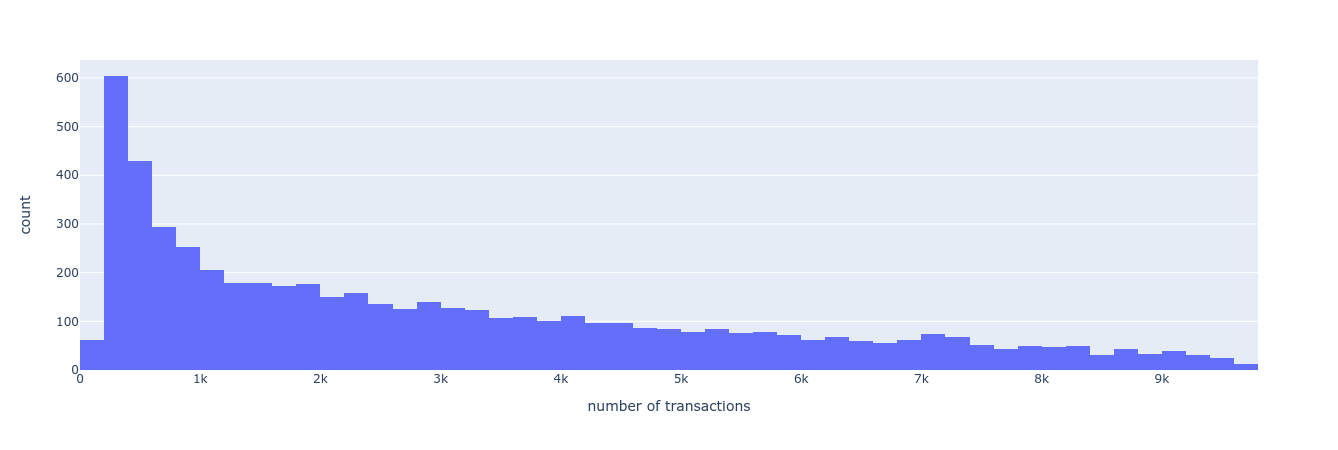

In [20]:
fig = px.histogram(counts, x='count', 
             labels={'count':'number of transactions'})
fig.show()

In [21]:
routes = pd.read_csv('data/routes4.csv')

In [22]:
routes.head()

,user_id,start_coords,finish_coords,dt_start,dt_finish,near_border,distance,is_weekend,time_in_city
0,100275,"[22.393593, 48.640953]","[[22.267818, 48.651695], [22.264284, 48.651558...",2020-09-02 14:03:23,"['2020-09-02 14:03:48', '2020-09-02 14:19:55',...",1,13.971561,0,0.812500
1,100275,"[22.359406, 48.56368300000001]","[[22.32819, 48.59585], [22.306812, 48.612396],...",2020-09-02 13:53:04,"['2020-09-02 13:53:43', '2020-09-02 13:53:44',...",0,4.788373,0,0.146944
2,100275,"[30.529755, 50.450253]","[[22.31705, 48.596935]]",2020-09-01 00:04:42,['2020-09-02 13:52:38'],0,928.469001,0,0.000000
3,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387]]",2020-09-22 11:11:42,['2020-09-22 11:12:51'],0,6.620737,0,0.000000
4,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387], [22.29613, 48.61947], ...",2020-09-22 10:06:18,"['2020-09-22 10:08:07', '2020-09-22 10:25:07',...",0,6.620737,0,0.993611


In [26]:
from_region = []

for _, row in routes.iterrows():
    p = Point(json.loads(row.start_coords)[0], json.loads(row.start_coords)[1])
    if oblast_area.contains(p):
        from_region.append(1)
    else:
        from_region.append(0)

In [27]:
routes['from_region'] = from_region

In [32]:
routes.head(10)

,user_id,start_coords,finish_coords,dt_start,dt_finish,near_border,distance,is_weekend,time_in_city,from_region
0,100275,"[22.393593, 48.640953]","[[22.267818, 48.651695], [22.264284, 48.651558...",2020-09-02 14:03:23,"['2020-09-02 14:03:48', '2020-09-02 14:19:55',...",1,13.971561,0,0.812500,1
1,100275,"[22.359406, 48.56368300000001]","[[22.32819, 48.59585], [22.306812, 48.612396],...",2020-09-02 13:53:04,"['2020-09-02 13:53:43', '2020-09-02 13:53:44',...",0,4.788373,0,0.146944,1
2,100275,"[30.529755, 50.450253]","[[22.31705, 48.596935]]",2020-09-01 00:04:42,['2020-09-02 13:52:38'],0,928.469001,0,0.000000,0
3,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387]]",2020-09-22 11:11:42,['2020-09-22 11:12:51'],0,6.620737,0,0.000000,1
4,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387], [22.29613, 48.61947], ...",2020-09-22 10:06:18,"['2020-09-22 10:08:07', '2020-09-22 10:25:07',...",0,6.620737,0,0.993611,1
5,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387], [22.32819, 48.59585]]",2020-09-22 10:03:41,"['2020-09-22 10:04:42', '2020-09-22 10:04:42']",0,6.620737,0,0.000000,1
6,100276,"[22.303923, 48.553032]","[[22.306623, 48.59387]]",2020-09-17 13:12:28,['2020-09-22 10:02:53'],0,4.218543,0,0.000000,1
7,100276,"[22.359406, 48.56368300000001]","[[22.32819, 48.59585]]",2020-09-17 13:11:14,['2020-09-17 13:12:08'],0,4.788373,0,0.000000,1
8,100276,"[22.359406, 48.56368300000001]","[[22.312164000000006, 48.60053]]",2020-09-17 13:01:44,['2020-09-17 13:02:13'],0,6.463401,0,0.000000,1
9,100276,"[22.359406, 48.56368300000001]","[[22.302198, 48.609253], [22.306623, 48.59387]...",2020-09-16 11:41:42,"['2020-09-16 11:41:50', '2020-09-16 11:41:51',...",0,7.884860,0,25.322778,1


In [35]:
'[\'2020-09-22 10:04:42\', \'2020-09-22 10:04:42\']'[13:15]

'10'

In [37]:
import datetime

arrival_time = []

for _, row in routes.iterrows():
    #dt = datetime.datetime.strptime(row.dt_finish[0], '%Y-%m-%d %H:%M:%S')
    ar_time = int(row.dt_finish[13:15]) + int(row.dt_finish[16:18]) / 60
    arrival_time.append(ar_time)

In [40]:
routes['arrival_time'] = arrival_time

In [11]:
routes.head()

,user_id,start_coords,finish_coords,dt_start,dt_finish,near_border,distance,is_weekend,time_in_city,from_region,arrival_time
0,100275,"[22.393593, 48.640953]","[[22.267818, 48.651695], [22.264284, 48.651558...",2020-09-02 14:03:23,"['2020-09-02 14:03:48', '2020-09-02 14:19:55',...",1,13.971561,0,0.812500,1,14.050000
1,100275,"[22.359406, 48.56368300000001]","[[22.32819, 48.59585], [22.306812, 48.612396],...",2020-09-02 13:53:04,"['2020-09-02 13:53:43', '2020-09-02 13:53:44',...",0,4.788373,0,0.146944,1,13.883333
2,100275,"[30.529755, 50.450253]","[[22.31705, 48.596935]]",2020-09-01 00:04:42,['2020-09-02 13:52:38'],0,928.469001,0,0.000000,0,13.866667
3,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387]]",2020-09-22 11:11:42,['2020-09-22 11:12:51'],0,6.620737,0,0.000000,1,11.200000
4,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387], [22.29613, 48.61947], ...",2020-09-22 10:06:18,"['2020-09-22 10:08:07', '2020-09-22 10:25:07',...",0,6.620737,0,0.993611,1,10.133333


In [43]:
routes.to_csv('data/routes5.csv', index=False)

In [10]:
routes = pd.read_csv('data/routes5.csv')

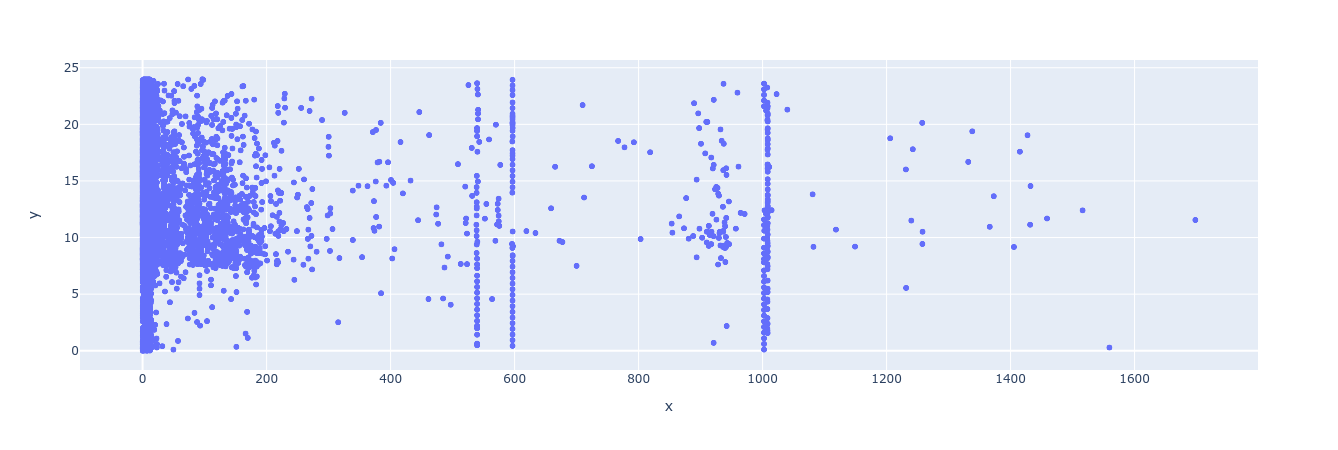

In [58]:
import plotly.express as px
fig = px.scatter(x=routes.distance, y=routes.arrival_time)
fig.show()

In [17]:
from geopy import distance
from tqdm import tqdm

last_index = 0
start_places = []
start_time = []
new_distances = []

for index in tqdm(counts):
    tmp = data[last_index:last_index+index]
    tmp.reset_index(drop=True, inplace=True)
    
    find = False
    for i, r in tmp.iterrows():
        if r.inside == 1:
            tmp = tmp[i:]
            find = True
            break
        
    if find == False:
        continue
    
    ignore = False
    prev_is_finish = True
    start_point = []
    finish_point = []
    start_dt = ''
    
    for _, row in tmp.iterrows():
        if (row.inside == 1) and (prev_is_finish):
            ignore = False
            finish_point = [row.lat, row.lon]
            prev_is_finish = True
            continue
        if (row.inside == 1) and (not prev_is_finish):
            ignore = False
            if len(start_point) > 0:
                start_places.append(start_point)
                start_time.append(start_dt)
                new_distances.append(dist)
            
            prev_is_finish = True
            start_point = []
            finish_point = [row.lat, row.lon]
            start_dt = ''
            dist = 0
            continue
        if (row.inside == 0):
            if ignore:
                continue
            
            if len(start_point) == 0:
                start_point = [row.lon, row.lat]
                start_dt = row.event_dt
                dist = distance.distance(finish_point, [row.lat, row.lon]).km
            else:
                new_dist = distance.distance(finish_point, [row.lat, row.lon]).km
                if new_dist > dist * 0.95:
                    start_point = [row.lon, row.lat]
                    start_dt = row.event_dt
                    dist = new_dist
                else:
                    ignore = True
            
            prev_is_finish = False
            continue
            
    if len(start_point) > 0:
                start_places.append(start_point)
                start_time.append(dt)
                new_distances.append(dist)

    last_index += index

100%|██████████| 5596/5596 [23:16<00:00,  4.01it/s]


In [18]:
print(len(start_places))
print(len(start_time))
print(len(new_distances))
print(routes.shape)

18019
18019
18019
(18019, 11)


In [16]:
from geopy import distance

distance.distance([48.640953, 22.393593], [48.651695, 22.267818]).km

9.344829829174023

In [91]:
routes.drop(['new_distances'], axis=1, inplace=True)

In [87]:
routes['distance'] = new_distances

In [88]:
routes['start_coords'] = start_places

In [24]:
routes.to_csv('data/routes6.csv', index=False)

In [82]:
routes = pd.read_csv('data/routes6.csv')

In [ ]:
routes['new_start_dt'] = start_time

In [89]:
routes.head()

,user_id,start_coords,finish_coords,dt_start,dt_finish,near_border,distance,is_weekend,time_in_city,from_region,arrival_time,new_distances,new_start_coords,count_of_transactions
0,100275,"[22.393593, 48.640953]","[[22.267818, 48.651695], [22.264284, 48.651558...",2020-09-02 14:03:23,"['2020-09-02 14:03:48', '2020-09-02 14:19:55',...",1,9.344830,0,0.812500,1,14.050000,9.344830,"[22.393593, 48.640953]",798
1,100275,"[22.359406, 48.56368300000001]","[[22.32819, 48.59585], [22.306812, 48.612396],...",2020-09-02 13:53:04,"['2020-09-02 13:53:43', '2020-09-02 13:53:44',...",0,4.254433,0,0.146944,1,13.883333,4.254433,"[22.359406, 48.56368300000001]",798
2,100275,"[22.373098, 48.4305]","[[22.31705, 48.596935]]",2020-09-01 00:04:42,['2020-09-02 13:52:38'],0,18.965210,0,0.000000,0,13.866667,18.965210,"[22.373098, 48.4305]",798
3,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387]]",2020-09-22 11:11:42,['2020-09-22 11:12:51'],0,5.141692,0,0.000000,1,11.200000,5.141692,"[22.359406, 48.56368300000001]",9241
4,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387], [22.29613, 48.61947], ...",2020-09-22 10:06:18,"['2020-09-22 10:08:07', '2020-09-22 10:25:07',...",0,5.141692,0,0.993611,1,10.133333,5.141692,"[22.359406, 48.56368300000001]",9241


In [77]:
count_of_transactions = []

for _, row in routes.iterrows():
    count_of_transactions.append(int(counts.loc[counts['user_id'] == row.user_id]['count']))

In [84]:
routes['count_of_transactions'] = count_of_transactions

In [177]:
routes.head()

,user_id,start_coords,finish_coords,dt_start,dt_finish,near_border,distance,is_weekend,time_in_city,from_region,arrival_time,new_start_coords,count_of_transactions
0,100275,"[22.393593, 48.640953]","[[22.267818, 48.651695], [22.264284, 48.651558...",2020-09-02 14:03:23,"['2020-09-02 14:03:48', '2020-09-02 14:19:55',...",1,9.344830,0,0.812500,1,14.050000,"[22.393593, 48.640953]",798
1,100275,"[22.359406, 48.56368300000001]","[[22.32819, 48.59585], [22.306812, 48.612396],...",2020-09-02 13:53:04,"['2020-09-02 13:53:43', '2020-09-02 13:53:44',...",0,4.254433,0,0.146944,1,13.883333,"[22.359406, 48.56368300000001]",798
2,100275,"[22.373098, 48.4305]","[[22.31705, 48.596935]]",2020-09-01 00:04:42,['2020-09-02 13:52:38'],0,18.965210,0,0.000000,0,13.866667,"[22.373098, 48.4305]",798
3,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387]]",2020-09-22 11:11:42,['2020-09-22 11:12:51'],0,5.141692,0,0.000000,1,11.200000,"[22.359406, 48.56368300000001]",9241
4,100276,"[22.359406, 48.56368300000001]","[[22.306623, 48.59387], [22.29613, 48.61947], ...",2020-09-22 10:06:18,"['2020-09-22 10:08:07', '2020-09-22 10:25:07',...",0,5.141692,0,0.993611,1,10.133333,"[22.359406, 48.56368300000001]",9241


In [174]:
border_dist = []

for _, row in routes.iterrows():
    dists = []
    for finish_point in json.loads(row.finish_coords):
        dists.append(distance.distance([48.6539, 22.2700], [finish_point[1], finish_point[0]]).km)
    
    border_dist.append(min(dists))

In [178]:
len(border_dist)

18019

In [179]:
routes['border_dist'] = border_dist

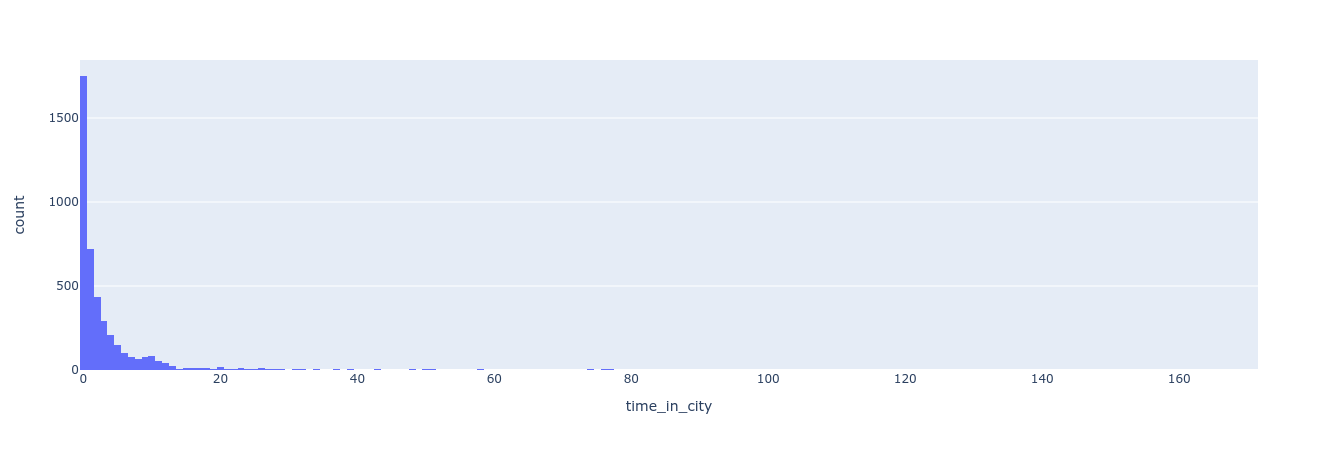

In [265]:
fig = px.histogram(routes_filtered, x='time_in_city', 
             labels={'count':'number of transactions'})
fig.show()

In [263]:
#routes_filtered = routes[(routes.time_in_city != 0) & (routes.count_of_transactions < 5000) & (routes.time_in_city < 200)]

In [264]:
routes_filtered.shape

(4345, 14)

In [266]:
routes_filtered.drop(['user_id', 'near_border', 'from_region', 'start_coords', 'finish_coords', 'dt_start', 'dt_finish'], axis=1, inplace=True)

/home/dmitrylyk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [291]:
routes_filtered.drop(['is_weekend'], axis=1, inplace=True)

/home/dmitrylyk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [292]:
counts = counts.reset_index(drop=True)
routes_filtered.head(10)

,distance,time_in_city,arrival_time,count_of_transactions,border_dist
0,9.344830,0.812500,14.050000,798,0.293207
1,4.254433,0.146944,13.883333,798,3.170613
19,140.309443,2.445278,8.650000,540,3.954750
22,75.591722,2.126111,8.916667,3607,2.628917
23,100.693088,37.118889,8.833333,725,0.405922
24,112.700276,1.001667,13.383333,1640,0.210226
25,119.022234,2.500000,11.133333,1640,0.474814
26,109.111166,2.375556,13.433333,1640,4.178157
27,53.287211,0.015833,0.866667,1855,3.988431
28,107.445868,0.361111,0.400000,1855,4.903744


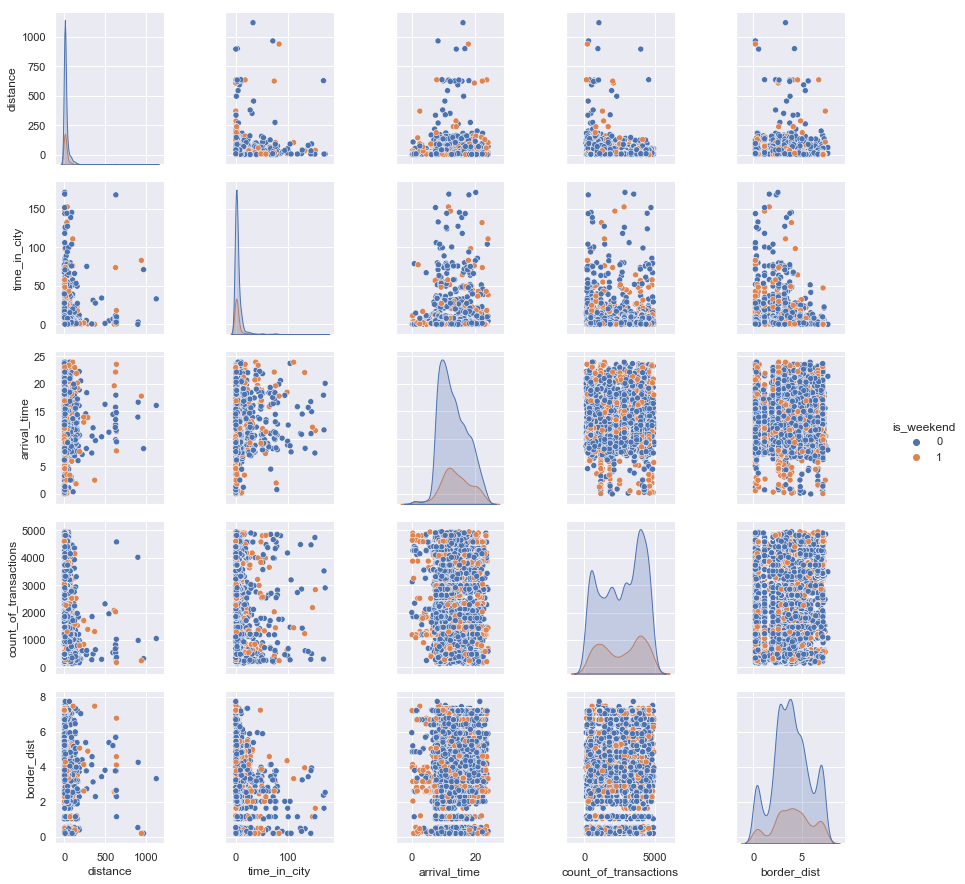

In [269]:
sns.pairplot(routes_filtered, hue='is_weekend')

In [270]:
routes_filtered.to_csv('data/x.csv', index=False)

In [248]:
routes_filtered.head()

,distance,time_in_city,arrival_time,count_of_transactions,border_dist
0,9.344830,0.812500,14.050000,798,0.293207
1,4.254433,0.146944,13.883333,798,3.170613
19,140.309443,2.445278,8.650000,540,3.954750
22,75.591722,2.126111,8.916667,3607,2.628917
23,100.693088,37.118889,8.833333,725,0.405922


In [293]:
df = (routes_filtered - routes_filtered.min()) / (routes_filtered.max() - routes_filtered.min())

In [136]:
df.drop(['from_region'], axis=1, inplace=True)

In [294]:
df.head()

,distance,time_in_city,arrival_time,count_of_transactions,border_dist
0,0.008273,0.004738,0.585823,0.138382,0.011018
1,0.003734,0.000856,0.578874,0.138382,0.393088
19,0.125050,0.014263,0.360667,0.084855,0.497208
22,0.067343,0.012401,0.371786,0.721162,0.321160
23,0.089725,0.216537,0.368311,0.123237,0.025985


In [238]:
np.unique(clusters, return_counts=True)

(array([-1,  0,  1]), array([  26, 3400,  922]))

In [301]:
from sklearn.datasets import load_digits
from MulticoreTSNE import MulticoreTSNE as TSNE
from matplotlib import pyplot as plt


embeddings = TSNE(n_jobs=4).fit_transform(df)
vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(vis_x, vis_y, c=clusters, cmap=plt.cm.get_cmap("jet", len(np.unique(clusters))), marker='.')
plt.show()

In [233]:
len(np.unique(clusters))

3

In [108]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.figure(figsize=(12, 8))
plt.scatter(df['distance'], df['time_in_city'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [207]:
pred_y

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

[1.68427719e-06 1.68427719e-06 5.22125928e-05 ... 6.99558764e-01
 7.37100704e-01 8.42586315e-01]


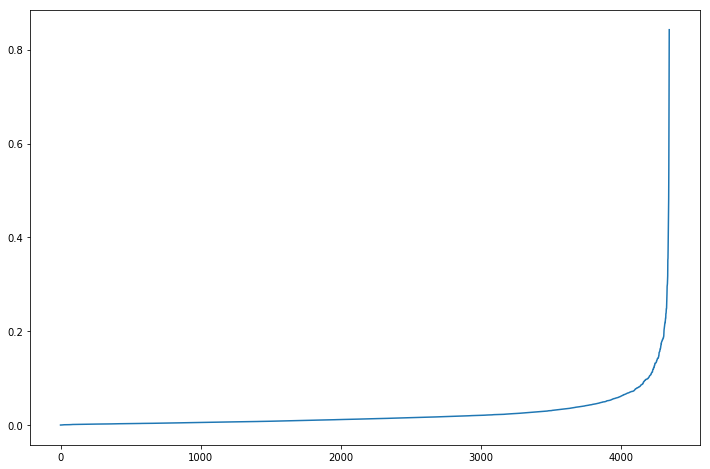

In [133]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(df)
distances, indices = nearest_neighbors.kneighbors(df)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.figure(figsize=(12, 8))
plt.plot(distances)
plt.show()

<Figure size 864x576 with 0 Axes>

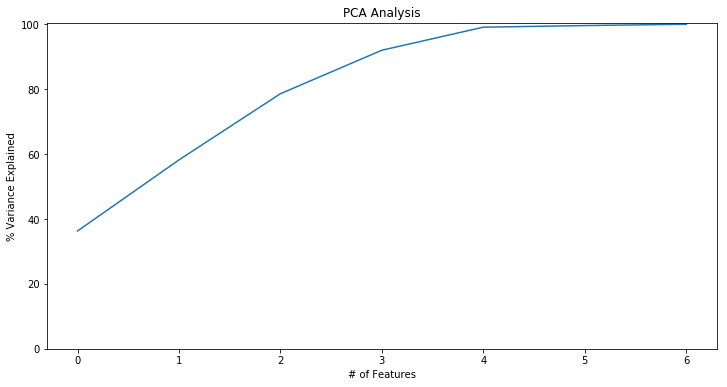

In [134]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(df)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
plt.figure(figsize=(12, 8))
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.plot(var)

In [149]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [295]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

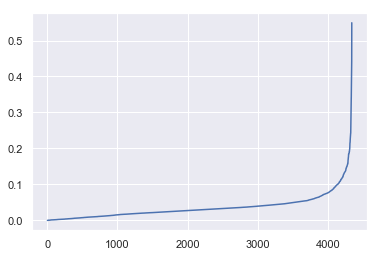

In [296]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [297]:
m = DBSCAN(eps=0.15, min_samples=5)
m.fit(df)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [298]:
clusters = m.labels_

In [299]:
clusters

array([0, 0, 0, ..., 0, 0, 0])

In [300]:
len(np.unique(clusters))

4

In [ ]:
iot_group = folium.FeatureGroup('iot', control=True, show=False)

In [ ]:
iot_map = folium.Map(prefer_canvas=True)

for _, point in test_user.iterrows():
    p = folium.Marker([point['lat'], point['lon']], tooltip=f"Target = {point['event_dt']}",
                      icon=folium.Icon(color='blue',icon_color='#FFFFFF'))
    p.add_to(iot_group)

iot_group.add_to(iot_map)
folium.LayerControl(collapsed=False).add_to(iot_map)

iot_map.save('iot.html')